In [1]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [2]:
scRNA = readRDS('./after_rename.rds')

In [3]:
scRNA

An object of class Seurat 
36329 features across 40884 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Warning message:
"Could not find Cd40 in the default search locations, found in 'RNA' assay instead"


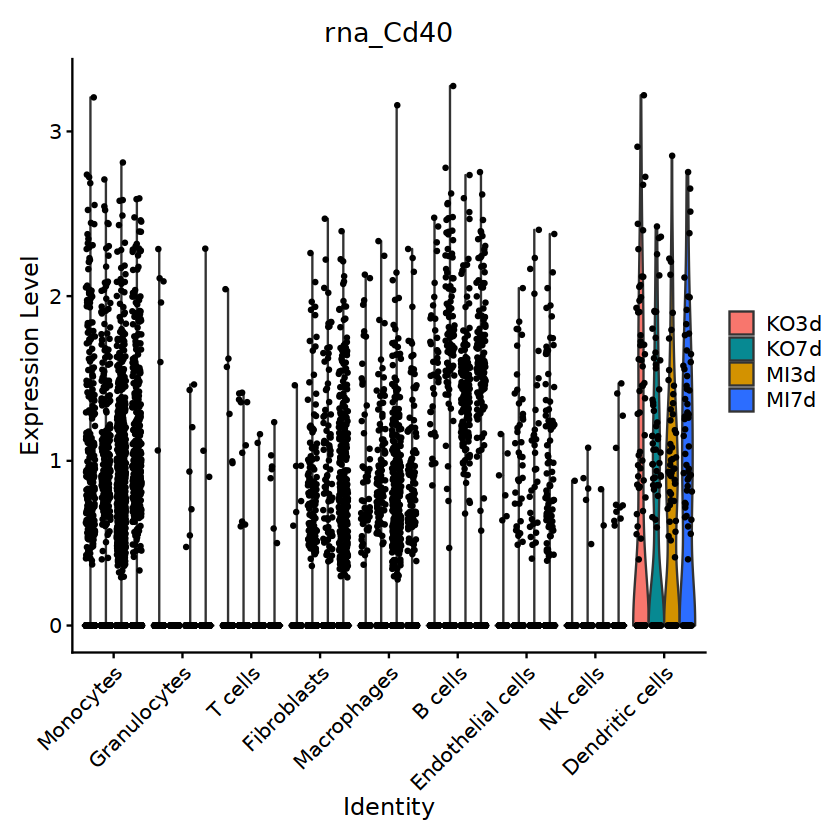

In [4]:
VlnPlot(scRNA,features = 'Cd40',split.by = 'orig.ident')

In [5]:
sce = scRNA

In [6]:
table(sce$celltype)


          B cells   Dendritic cells Endothelial cells       Fibroblasts 
             2463               363              1603             14388 
     Granulocytes       Macrophages         Monocytes          NK cells 
             2683              4186             10234              1516 
          T cells 
             3448 

In [7]:
Idents(scRNA) = 'celltype'
T= subset(scRNA, idents= c('Monocytes','Macrophages'))

In [8]:
immune.combined = T

In [9]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.4)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5518 anchors

Filtering anchors

	Retained 4270 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7334 anchors

Filtering anchors

	Retained 4100 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7601 anchors

Filtering anchors

	Retained 4328 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5929 anchors

Filtering anchors

	Retained 4229 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6610 anchors

Filtering anchors

	Retained 4676 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9074 anchors

Filtering anchors

	Retained 6553 anchors

Merging dataset 4 into 3

Extracting anchors for merged samples

Finding integration vecto

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14420
Number of edges: 546073

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9027
Number of communities: 13
Elapsed time: 3 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
06:03:40 UMAP embedding parameters a = 0.9922 b = 1.112

06:03:40 Read 14420 rows and found 20 numeric columns

06:03:40 Using Annoy for neighbor search, n_neighbors = 30

06:03:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:03:41 Writing NN index file to temp file /tmp/RtmpOsE9lw/file3ce4b7c461f6

06:03:41 Searching Annoy index using 1 thread, search_k = 3000

06:03:45 Annoy recall = 100%

06:03:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

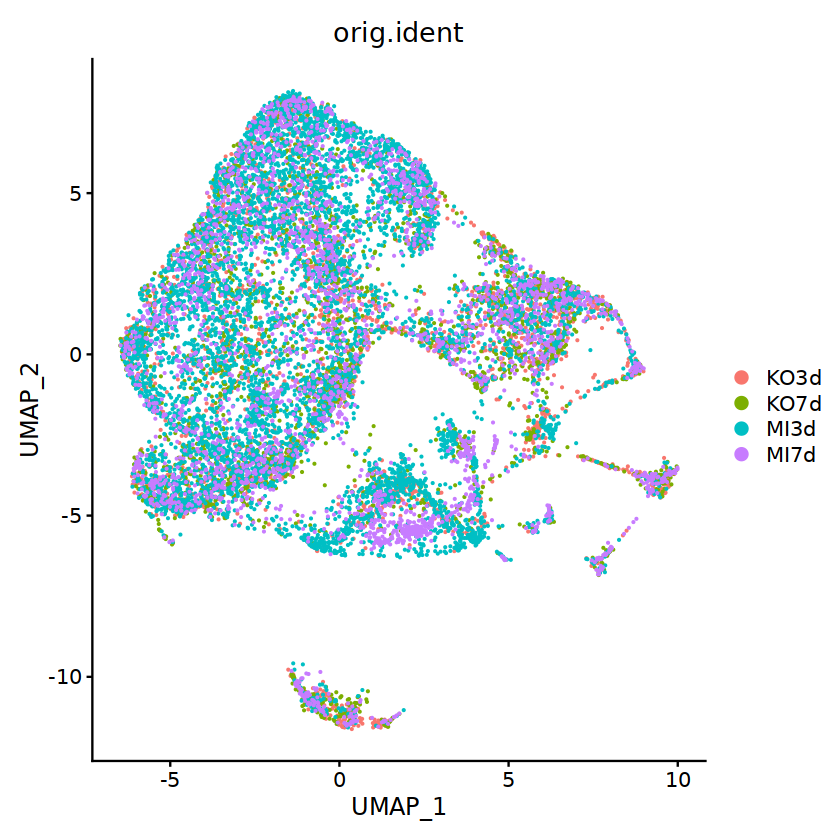

In [10]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

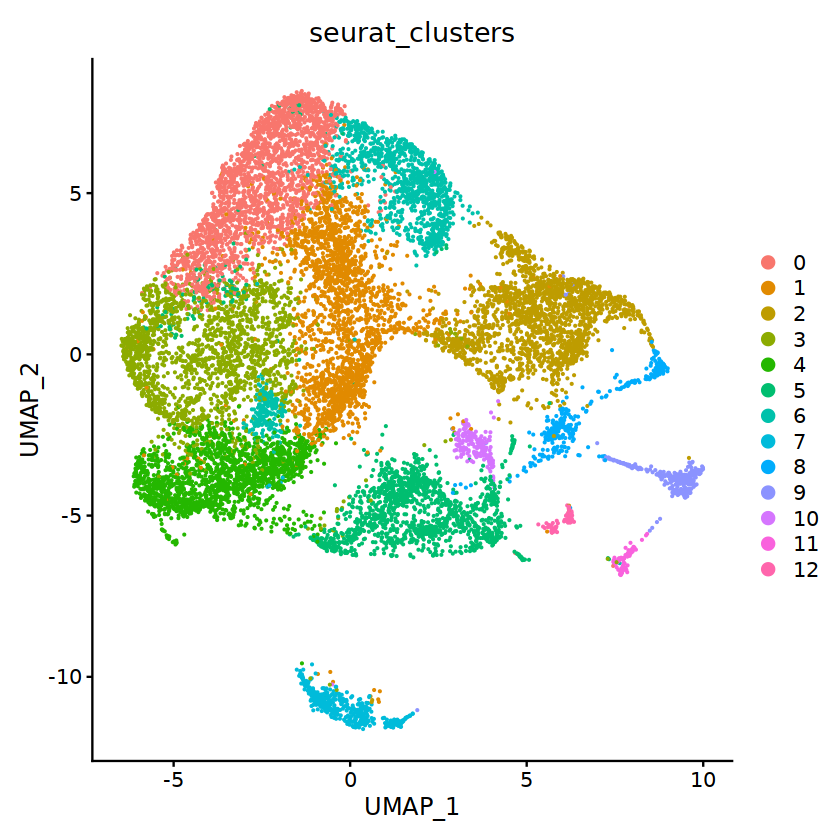

In [11]:
DimPlot(immune.combined, reduction = "umap", group.by = "seurat_clusters")

In [25]:
Idents(immune.combined) = 'seurat_clusters'
sce.markers <- FindAllMarkers(object = immune.combined, only.pos =T,
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



ERROR: Error in (only.pos) && nrow(x = gde.all) > 0: invalid 'x' type in 'x && y'


In [20]:
write.csv(sce.markers,file = 'sce.markers.myl.csv')

In [21]:
Idents(immune.combined) = 'seurat_clusters'

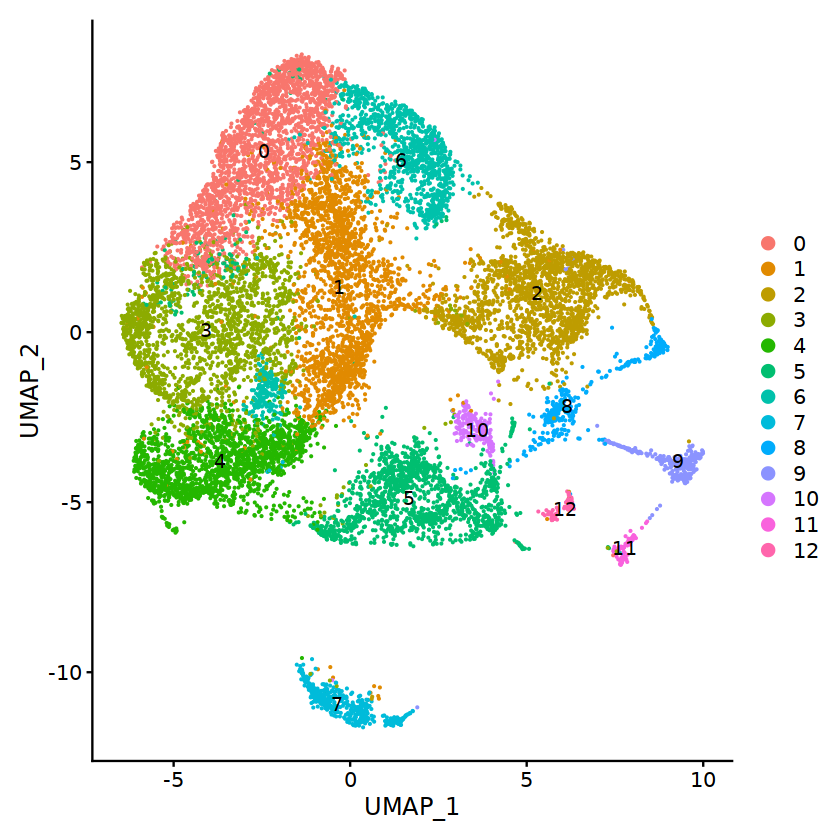

In [22]:
DimPlot(immune.combined,label = TRUE)

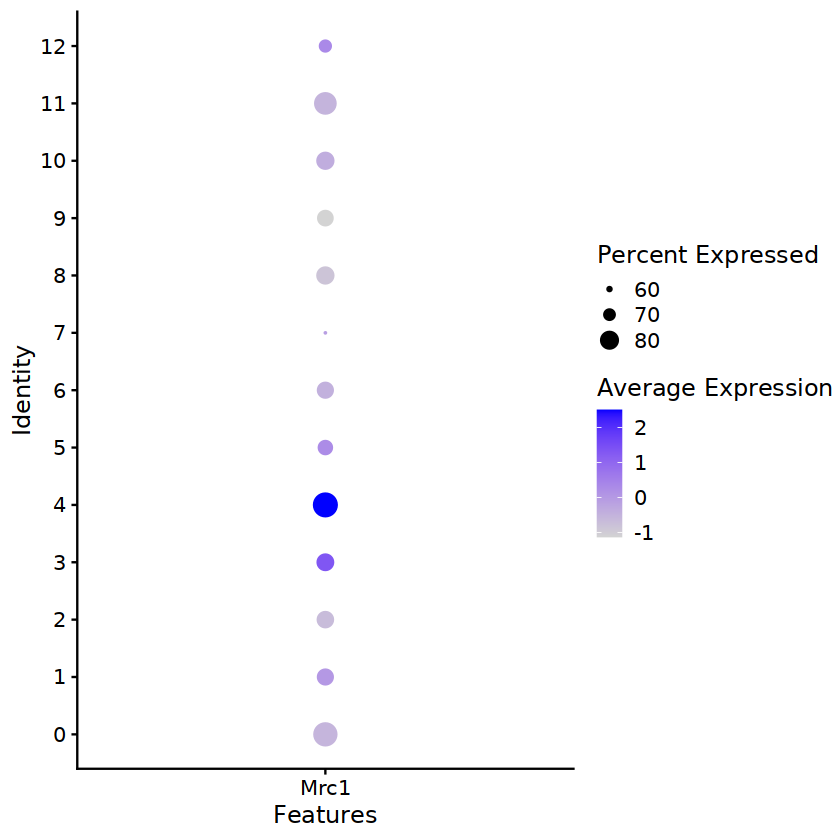

In [23]:
DotPlot(immune.combined,features = c('Mrc1'))


KO3d KO7d MI3d MI7d 
2501 2505 6449 2965 


          0           1           2           3           4           5 
0.157350902 0.149237171 0.134812760 0.129126214 0.128640777 0.106102635 
          6           7           8           9          10          11 
0.092579750 0.032177531 0.022538141 0.021914008 0.013037448 0.006796117 
         12 
0.005686546 

    
     KO3d KO7d MI3d MI7d
  0   324  302 1190  453
  1   320  451  910  471
  2   504  458  538  444
  3   302  273  988  299
  4   307  403  786  359
  5   223  111  813  383
  6   131  144  815  245
  7   140  139   90   95
  8   120   63  107   35
  9   110   88   42   76
  10    4   32  104   48
  11   13   26   26   33
  12    3   15   40   24

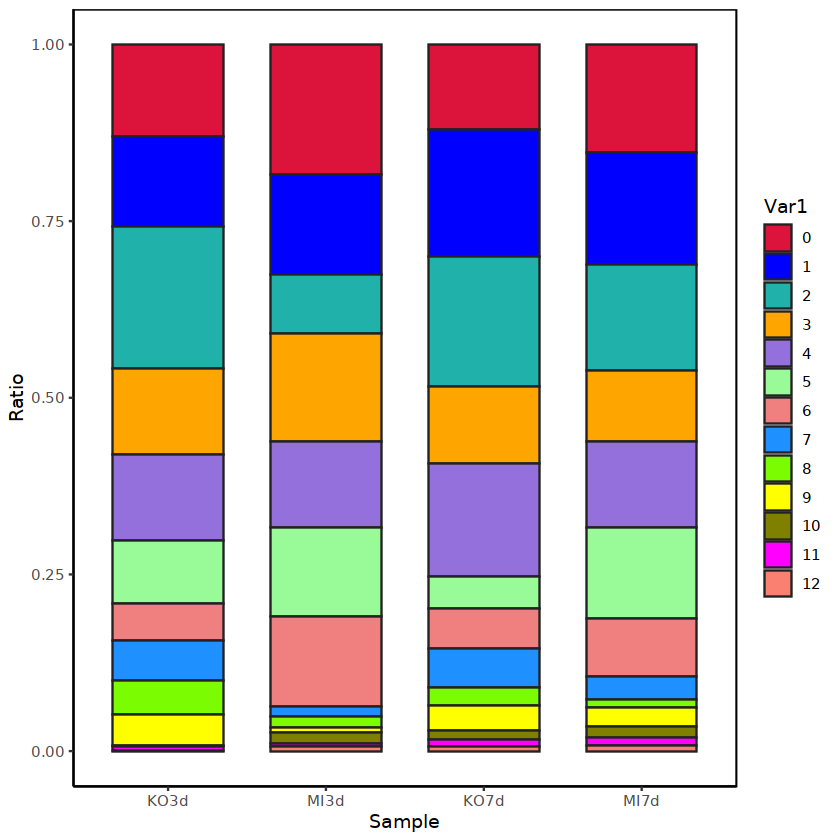

In [24]:
scRNA = immune.combined

Idents(scRNA) ='seurat_clusters'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

In [26]:
rmp.macro = c('Pdgfa',
'Pdgfb',
'Igf1',
'Hgf',
'Vegfb',
'Gdf15',
'Spp1',
'Sparc',
'Mmp14'
)

In [ ]:
Il1b
Il18
Ccl9
Vegfa


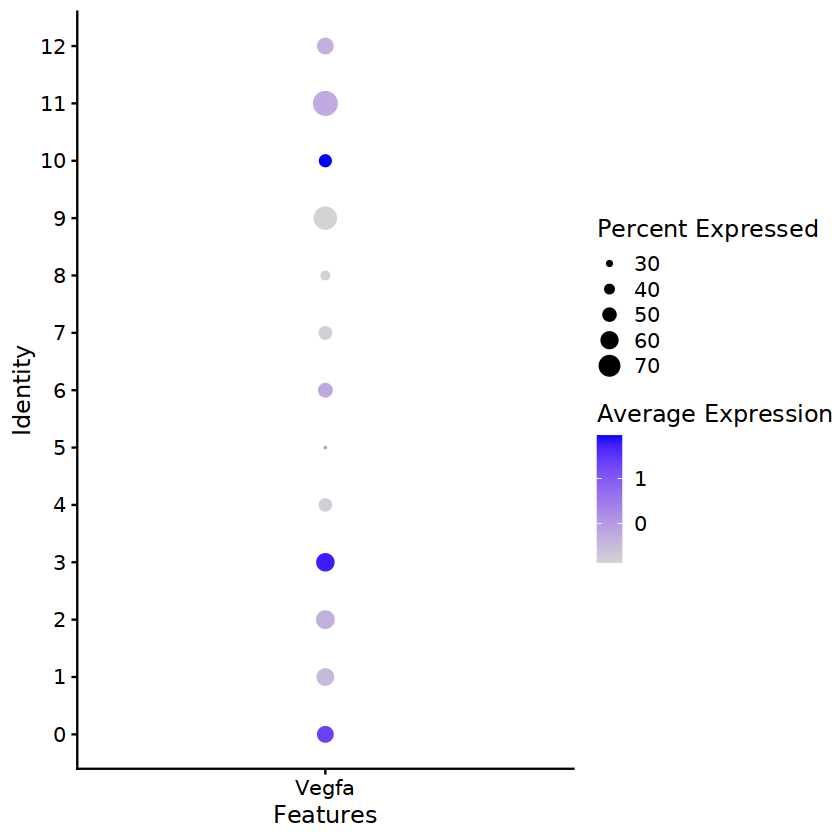

In [32]:
DotPlot(immune.combined,features = c('Vegfa'))